In [129]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd

city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

city_data_df = pd.read_csv(city_data)
# city_data_df.head(10)

In [130]:
ride_data_df = pd.read_csv(ride_data)
# ride_data_df.head(10)

In [131]:
# city_data_df.count()

In [132]:
# ride_data_df.count()

In [133]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [134]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [135]:
# city_data_df["type"].unique()

In [136]:
# sum(city_data_df["type"] == "Suburban")

In [137]:
pyber_data_df = pd.merge(city_data_df, ride_data_df, how="left", on=["city","city"])
pyber_data_df

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2019-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2019-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2019-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2019-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2019-04-17 02:26:37,23.00,720020655850
...,...,...,...,...,...,...
2370,Jessicaport,1,Rural,2019-01-31 17:57:25,58.29,623154556195
2371,South Saramouth,7,Rural,2019-02-20 16:32:36,44.29,3622365199969
2372,South Saramouth,7,Rural,2019-01-28 15:55:33,31.25,7118046558393
2373,South Saramouth,7,Rural,2019-03-27 21:07:16,11.87,170351888128


In [138]:
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [139]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [140]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [141]:
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count= rural_cities_df.groupby(["city"]).mean()["driver_count"]

<IPython.core.display.Javascript object>


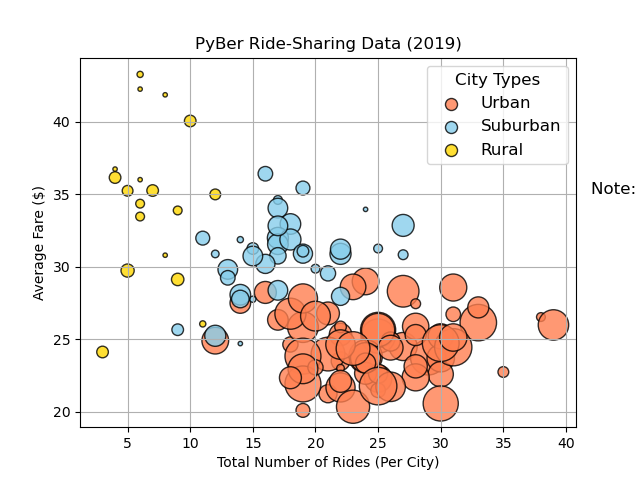

In [142]:
plt.scatter(urban_ride_count,
            urban_avg_fare, 
            s=urban_driver_count*10, 
            color="coral", 
            edgecolor="black", 
            linewidths=1, 
            alpha=.8, 
            label="Urban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()
plt.show()

In [143]:
plt.scatter(suburban_ride_count,
            suburban_avg_fare,
            s=10*suburban_driver_count, 
            color="skyblue",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8, 
            label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [144]:
plt.scatter(rural_ride_count,
            rural_avg_fare,
            s=10*rural_driver_count, 
            color="gold",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8, 
            label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

In [145]:
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

In [146]:
plt.text(42,35,"Note: Circle size correlates with driver count per city.", fontsize="12")

Text(42, 35, 'Note: Circle size correlates with driver count per city.')

In [147]:
plt.savefig("Analysis/Fig1.png")

In [148]:
# urban_cities_df.describe()

In [149]:
# urban_ride_count.describe()

In [150]:
# round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

In [151]:
# urban_ride_count.mode()

In [152]:
import numpy as np
import scipy.stats as sts

In [153]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [154]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [155]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [156]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

<IPython.core.display.Javascript object>


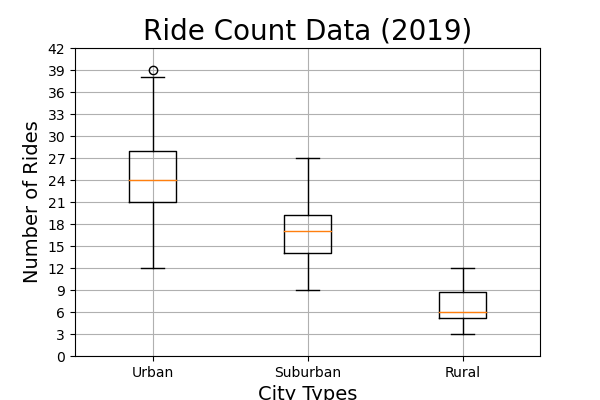

In [157]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(6, 4))

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png")

plt.show()

In [158]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


<IPython.core.display.Javascript object>


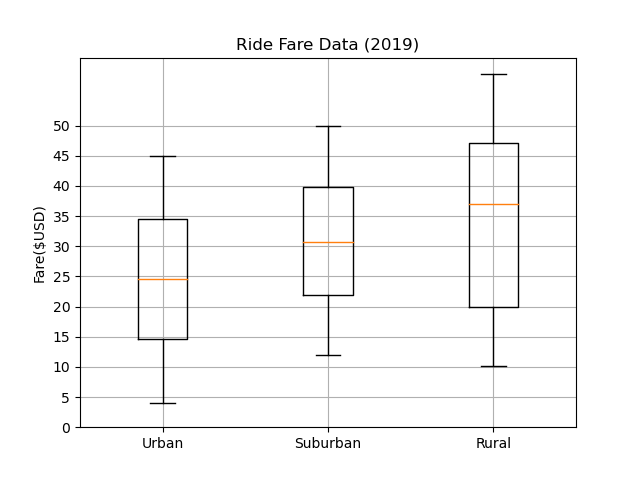

In [159]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots()

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')

ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()

In [160]:
print("Urban Summary Statistics")
urban_fares.describe()

Urban Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [161]:
print("Suburban Summary Statistics")
suburban_fares.describe()

Suburban Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [162]:
print("Rural Summary Statistics")
rural_fares.describe()

Rural Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

<IPython.core.display.Javascript object>


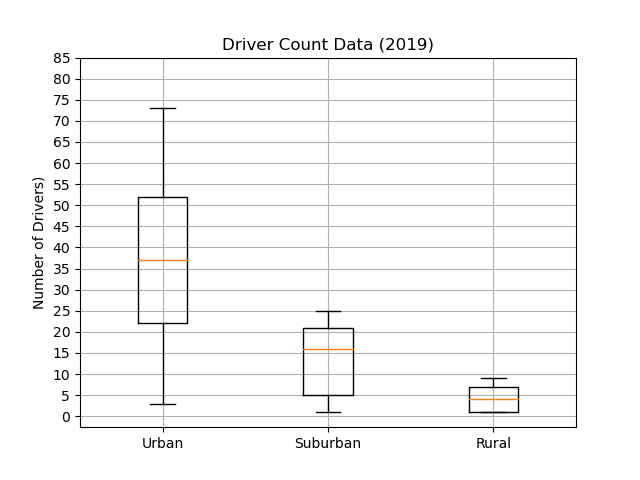

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [163]:
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots()

ax.boxplot(ride_count_data, labels=x_labels)

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')

ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.show()

print("Summary Statistics")
urban_drivers.describe()

In [164]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [165]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [166]:
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

<IPython.core.display.Javascript object>


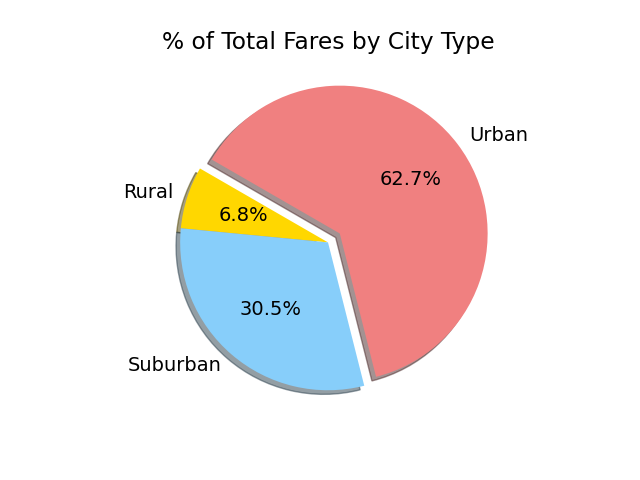

In [169]:
import matplotlib as mpl

fig, ax = plt.subplots()

ax.pie(type_percents,     
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, 
        startangle=150)

plt.title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14


plt.savefig('Analysis/Fig5.png')
plt.show()